# 1 Data Preparation to Integrate the Arthal1 (Healthy) RNA Sequence Count Data Set

## """Parse a whole directory with multiple quantification files"""

#### Dataset1: Healthy - Arabidopsis (Col-0)

#### Cynthia Soto
#### Fecha: 20 de Agosto 2020
#### Datatype representation: expression levels CDS (gene_name) 
#### Data quantify with HTSeq (alignments done with STAR SA) 

Data quantifications produced with HTSeq are absolute counts. Thus need to be prepared and transformated for a further exploration data analysis.

Workflow:
1) Explore data to get the correct format (remove or add headers; remove not informative data, etc.)
2) Get basic statics and count zero values.
3) Plus 1 to zero values to avoid arithmetical error when making Log2 convertion (avoid div/0 error)
3) Make Log2 convertions
4) Get basic statics
5) Save transformations and statistics in cvs file for further analysis. 


In [31]:
import pandas as pd
import numpy as np
import os 
import glob

In [53]:
try:
    # Change the current working Directory to the quantification dir    
    os.chdir("/home/cyntsc/Proyectos/athal1_htseq-counts/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")     
s_path=os.getcwd()    
print(s_path)

Directory changed
/home/cyntsc/Proyectos/athal1_htseq-counts


In [54]:
#print(os.listdir(os.getcwd()) # list files in Dir
os.listdir(os.getcwd())

['all_log2_3_ceros.csv',
 'all_log2_6_ceros.csv',
 'SRR6283145',
 'all_genesIDs_3cero',
 'SRR3383640_Log2.csv',
 'SRR6283144',
 'SRR3383821_Log2.csv',
 'all_log2_counter_cero.csv',
 'all_log2_dropped5ceros.csv',
 'SRR3383640',
 'SRR3383782_Log2.csv',
 'SRR6283145_Log2.csv',
 'all_log2_dropped7ceros.csv',
 'all_log2_dropped4ceros.csv',
 'SRR3383641_Log2.csv',
 'SRR3383783_Log2.csv',
 'all_log2_7_ceros.csv',
 'SRR3383783',
 'all_genesIDs_4cero',
 'all_log2_dropped6ceros.csv',
 'SRR3383822_Log2.csv',
 'SRR3383782',
 'all_genesIDs_cero',
 'all_log2_8_ceros.csv',
 'SRR3383822',
 'all_log2_dropped8ceros.csv',
 'all_log2_5_ceros.csv',
 'all_log2_4_ceros.csv',
 'SRR6283144_Log2.csv',
 'SRR3383641',
 'all_genesIDs_7cero',
 'all_genesIDs_5cero',
 'all_genesIDs_6cero',
 'all_log2_dropped3ceros.csv',
 'SRR3383821']

In [55]:
 ## CODE TO TRANSFORM DATA FROM ABS.VALS TO LOG2.VALS

for file in os.listdir(os.getcwd()):  
    #print(file)
    df= pd.read_csv(file, sep='\t', header=None)
    # Add column-names 
    
    try:     
        
        df.columns = ["Genes","Counts"]
        #print(df.head(3))
        #print(df.shape)
        #print(df.tail(5))
        df.drop(df.tail(5).index,inplace=True) # drop last n rows (refering statistics of HTSeq)
        #print(df.tail(5))
        #print (df.describe())
        ##Check for zeros, if there are, so need to plus 1 to vales to avoid div/0 error
        #print(df.isin([0]).sum())
        ## Plus 1 to avoid arithmetical error in Log2 transformation (avoid error div/0)
        df["Counts"] += 1
        ## check no more zero values
        #print(df.isin([0]).sum())
        ## Apply Log2 numpy function to absolute values and add a column
        df['log2_value'] = np.log2(df['Counts'])
        #print(df.head(3))       
        ## Send df t_Log2.csv to a statistics file for further analysis
        #df.to_csv(str(file)+'_Log2.csv', sep='\t', index=True)
        
        ## CODE TO STORE STATISTICS IN CVS FILE             
        #print (df.describe())        
        #df.describe().to_csv('../athal1_stats/'+str(file)+'_stats.csv', sep='\t')
          
    except:
        pass # doing nothing on exception, not processed because it is already pre-processed"
        

In [56]:

print("Path to retrieve data:", s_path)
try:
    # Change the current working Directory    
    os.chdir("../athal1_stats/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")     
    
s_path_to_store = str(os.getcwd())+'/'
print("Path to store cvs stats:", s_path_to_store)

Path to retrieve data: /home/cyntsc/Proyectos/athal1_htseq-counts
Directory changed
Path to store cvs stats: /home/cyntsc/Proyectos/athal1_stats/


In [68]:
## Prepare data for get basic statistic to explore the data 
s_path1=s_path_to_store+"allsample_stats.csv"
df=pd.read_csv(s_path1, sep='\t', header=0) 
df
is_log2=df['Metric']=='log2_value'
is_log2
df=df[is_log2]
df_plot=df

In [72]:
#df_plot['mean'].round(decimals=3)
df_plot=df.filter(['sample','mean','std','25%','50%','75%','max','Zeros']).round(decimals=3)
df_plot

,sample,mean,std,25%,50%,75%,max,Zeros
1,SRR3383640,4.919,3.791,0.0,5.728,8.140,17.227,7396
3,SRR3383821,5.118,3.944,0.0,5.954,8.459,17.179,7360
5,SRR3383782,5.701,4.243,1.0,6.741,9.248,19.334,6888
7,SRR6283145,5.307,4.182,0.0,6.190,8.913,17.106,7688
9,SRR3383641,5.620,4.207,0.0,6.728,9.197,18.265,7039
11,SRR3383783,4.942,3.892,0.0,5.700,8.248,18.268,7627
13,SRR3383822,4.672,3.706,0.0,5.358,7.814,16.796,7702
15,SRR6283144,5.270,4.198,0.0,6.000,8.877,18.067,7700


        sample   mean    std  25%    50%    75%     max  Zeros
1   SRR3383640  4.919  3.791  0.0  5.728  8.140  17.227   7396
3   SRR3383821  5.118  3.944  0.0  5.954  8.459  17.179   7360
5   SRR3383782  5.701  4.243  1.0  6.741  9.248  19.334   6888
7   SRR6283145  5.307  4.182  0.0  6.190  8.913  17.106   7688
9   SRR3383641  5.620  4.207  0.0  6.728  9.197  18.265   7039
11  SRR3383783  4.942  3.892  0.0  5.700  8.248  18.268   7627
13  SRR3383822  4.672  3.706  0.0  5.358  7.814  16.796   7702
15  SRR6283144  5.270  4.198  0.0  6.000  8.877  18.067   7700


/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


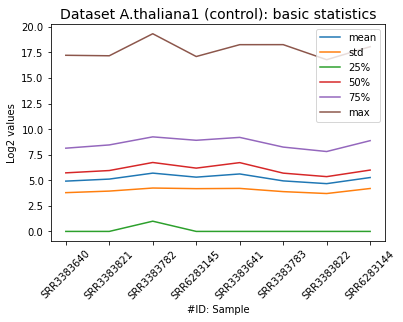

In [84]:
import matplotlib.pyplot as plt

# Plot data to explore variance between samples
print(df_plot)
#plt.figure(figsize=(20,10))

df_plot.plot(x='sample', y=['mean','std','25%','50%','75%','max'])   #kind='bar'

plt.xlabel('#ID: Sample')
plt.xticks(rotation=45)
plt.ylabel('Log2 values')
plt.title('Dataset A.thaliana1 (control): basic statistics', fontsize=14)
plt.legend()
plt.show()
#plt.savefig("athal1_basic_statics.png")


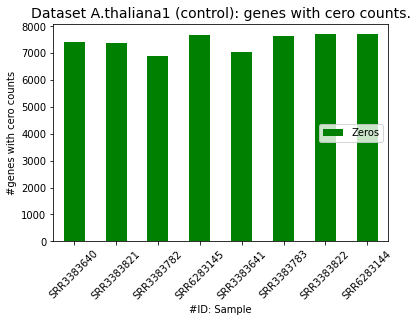

<Figure size 432x288 with 0 Axes>

In [93]:
# More plots

df_plot.plot(x='sample', y='Zeros', kind='bar', color='green')
plt.xlabel('#ID: Sample')
plt.xticks(rotation=45)
plt.ylabel('#genes with cero counts')
plt.title('Dataset A.thaliana1 (control): genes with cero counts.', fontsize=14)
plt.legend(loc=7)
plt.show()
plt.savefig("athal1_zeroLog2_counts.png")